In [2]:
import pandas as pd
import numpy as np
import math
from textblob import TextBlob as tb
import re
from nltk.corpus import stopwords

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
may=pd.read_csv('MayRaw.csv')

In [11]:
may.shape

(3047, 7)

In [5]:
may.columns

Index(['Unnamed: 0', 'created_at', 'username', 'tweet', 'language',
       'replies_count', 'retweets_count', 'likes_count'],
      dtype='object')

In [6]:
may.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
may.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [8]:
may['language'].unique()

array(['und', 'en', 'ar', 'ca', 'hi', 'in', 'ro', 'bn', 'ta', 'ur', 'es',
       'lt', 'et', 'mr', 'tl', 'ht', 'fi', 'ne', 'nl', 'si', 'de', 'sv',
       'no', 'it', 'pa', 'kn', 'sl', 'te', 'pl', 'pt', 'ja', 'fr', 'ml',
       'th', 'vi', 'or', 'km', 'gu', 'tr'], dtype=object)

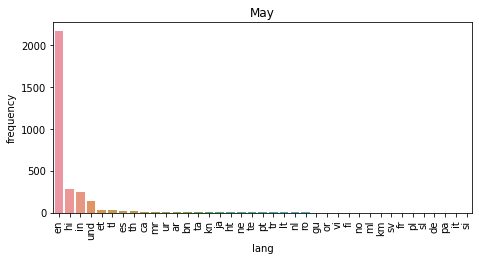

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
lang=may['language'].value_counts().rename_axis('lang').reset_index(name='frequency')
ax = sns.barplot(x="lang", y="frequency", data=lang)
plt.title("May")
plt.xticks(rotation=90)
plt.show()

In [10]:
lang.shape

(39, 2)

In [8]:
for i in may['language']:
    index_names = may[may['language']!='en' ].index
    may.drop(index_names, inplace = True)

In [9]:
may.shape

(2159, 7)

In [10]:
duplicates = may[may.duplicated()]
duplicates.shape

(323, 7)

In [11]:
may=may.drop_duplicates(keep='first')
may.shape

(1836, 7)

In [12]:
may

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
1,2021-05-03 03:20:28 India Standard Time,alidurrani88,"The corona virus has a possible 39,000 RNA mut...",en,0.0,0.0,2
2,2021-05-03 03:07:03 India Standard Time,drkaushiksuresh,Second wave of coronavirus infection in India ...,en,0.0,0.0,0
3,2021-05-03 02:55:32 India Standard Time,sohailmalik462,BBC News - India coronavirus: New record death...,en,0.0,0.0,0
5,2021-05-03 02:29:32 India Standard Time,bjp_bihar_,wear a mask and sanitize your hands and mainta...,en,0.0,0.0,1
6,2021-05-03 02:07:33 India Standard Time,sasmitchandan,BBC News - India coronavirus: New record death...,en,0.0,0.0,0
...,...,...,...,...,...,...,...
3037,2021-05-06T11:53:32.000Z,NaN,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en,NaN,NaN,1
3038,2021-05-01T18:00:50.000Z,NaN,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en,1.0,6.0,5
3039,2021-05-01T05:37:53.000Z,NaN,We are fighting another war against COVID-19 b...,en,1.0,NaN,1
3044,2021-05-02T19:27:49.000Z,NaN,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en,NaN,NaN,NaN


In [13]:
may.columns

Index(['created_at', 'username', 'tweet', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [14]:
may[['replies_count','retweets_count', 'likes_count']]=may[['replies_count','retweets_count', 'likes_count']].fillna(0)

In [15]:
may

,created_at,username,tweet,language,replies_count,retweets_count,likes_count
1,2021-05-03 03:20:28 India Standard Time,alidurrani88,"The corona virus has a possible 39,000 RNA mut...",en,0.0,0.0,2
2,2021-05-03 03:07:03 India Standard Time,drkaushiksuresh,Second wave of coronavirus infection in India ...,en,0.0,0.0,0
3,2021-05-03 02:55:32 India Standard Time,sohailmalik462,BBC News - India coronavirus: New record death...,en,0.0,0.0,0
5,2021-05-03 02:29:32 India Standard Time,bjp_bihar_,wear a mask and sanitize your hands and mainta...,en,0.0,0.0,1
6,2021-05-03 02:07:33 India Standard Time,sasmitchandan,BBC News - India coronavirus: New record death...,en,0.0,0.0,0
...,...,...,...,...,...,...,...
3037,2021-05-06T11:53:32.000Z,NaN,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en,0.0,0.0,1
3038,2021-05-01T18:00:50.000Z,NaN,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en,1.0,6.0,5
3039,2021-05-01T05:37:53.000Z,NaN,We are fighting another war against COVID-19 b...,en,1.0,0.0,1
3044,2021-05-02T19:27:49.000Z,NaN,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en,0.0,0.0,0


In [16]:
mayTweet=may[['tweet','language']]

In [17]:
mayTweet

,tweet,language
1,"The corona virus has a possible 39,000 RNA mut...",en
2,Second wave of coronavirus infection in India ...,en
3,BBC News - India coronavirus: New record death...,en
5,wear a mask and sanitize your hands and mainta...,en
6,BBC News - India coronavirus: New record death...,en
...,...,...
3037,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en
3038,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en
3039,We are fighting another war against COVID-19 b...,en
3044,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en


In [18]:
mayTweet=mayTweet.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [19]:
mayTweet

,index,tweet,language
0,1,"The corona virus has a possible 39,000 RNA mut...",en
1,2,Second wave of coronavirus infection in India ...,en
2,3,BBC News - India coronavirus: New record death...,en
3,5,wear a mask and sanitize your hands and mainta...,en
4,6,BBC News - India coronavirus: New record death...,en
...,...,...,...
1831,3037,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en
1832,3038,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en
1833,3039,We are fighting another war against COVID-19 b...,en
1834,3044,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en


In [20]:
mayTweet.drop(['index'],axis=1,inplace=True)

In [21]:
mayTweet

,tweet,language
0,"The corona virus has a possible 39,000 RNA mut...",en
1,Second wave of coronavirus infection in India ...,en
2,BBC News - India coronavirus: New record death...,en
3,wear a mask and sanitize your hands and mainta...,en
4,BBC News - India coronavirus: New record death...,en
...,...,...
1831,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en
1832,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en
1833,We are fighting another war against COVID-19 b...,en
1834,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en


In [22]:
mayTweet.to_csv('mayTweet.csv')

### --------extract HASTAGS--------- ###

In [23]:
mayTweet['hastags']=np.nan

In [24]:
def extract_hastags(text,i=0):
    hashtag_list = []
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[0:])
    mayTweet['hastags'][i]=hashtag_list
    i+=1


In [25]:
index=mayTweet.index
print(index)

RangeIndex(start=0, stop=1836, step=1)


In [28]:
extract_hastags(mayTweet['tweet'][8],8)

In [29]:
mayTweet['hastags'][8]

[]

In [35]:
for i in range(0,1836):
    text=mayTweet['tweet'][i]
    extract_hastags(text,i)


In [36]:
mayTweet['hastags']

0                           [#COVIDisAirborne, #Covid_19]
1                                                      []
2                                          [#coronavirus]
3       [#COVIDSecondWaveInIndia, #COVIDEmergency, #co...
4                                                      []
                              ...                        
1831                                                   []
1832                              [#KolkataFightsCovid19]
1833                [#harshreality, #GiveTheVaccinesModi]
1834                                                   []
1835                                                   []
Name: hastags, Length: 1836, dtype: object

### ---- Extract @texts ----

In [37]:
mayTweet['attherate']=np.nan

In [38]:
def extract_attherate(text,i=0):
    attherate_list = []
    for word in text.split():
        if word[0] == '@':
            attherate_list.append(word[0:])
    mayTweet['attherate'][i]=attherate_list
    i+=1

In [44]:
for i in range(0,1836):
    text=mayTweet['tweet'][i]
    extract_attherate(text,i)


In [45]:
mayTweet['attherate']

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                                      []
                              ...                        
1831    [@Lshukla6, @SonuSood, @derekobrienmp, @Mamata...
1832        [@srijitspeaketh, @SandyMukherg, @AnanyaRian]
1833                                      [@narendramodi]
1834                       [@DemonGod21, @AnshumanBanka8]
1835        [@SandipGhose, @nitin_gadkari, @rajnathsingh]
Name: attherate, Length: 1836, dtype: object

In [46]:
mayTweet.to_csv('mayTweet.csv')

In [48]:
mayTweet['urls']=np.nan

In [49]:
def extract_urls(text,i=0):
    attherate_list = []
    for word in text.split():
        if word[0:5] == 'https':
            attherate_list.append(word[0:])
    mayTweet['urls'][i]=attherate_list
    i+=1

In [50]:
mayTweet['tweet'][1]

'Second wave of coronavirus infection in India by new variant of double mutant B.1.617  https://t.co/xuMMbohior'

In [51]:
extract_urls(mayTweet['tweet'][1],1)

C:\Users\gango\AppData\Local\Temp/ipykernel_21020/343483884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayTweet['urls'][i]=attherate_list
C:\Users\gango\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
mayTweet['urls'][1]

['https://t.co/xuMMbohior']

In [53]:
for i in range(0,1836):
    text=mayTweet['tweet'][i]
    extract_urls(text,i)


In [54]:
mayTweet['urls']

0                                                  []
1                           [https://t.co/xuMMbohior]
2                           [https://t.co/jYpHJ58kJC]
3                                                  []
4                           [https://t.co/HpTGBrGE3K]
                            ...                      
1831                                               []
1832    [https://coviddelhi.com, https://covidwb.com]
1833                                               []
1834                                               []
1835                                               []
Name: urls, Length: 1836, dtype: object

In [55]:
mayTweet.to_csv('mayTweet.csv')

In [56]:
mayTweet

,tweet,language,hastags,attherate,urls
0,"The corona virus has a possible 39,000 RNA mut...",en,"[#COVIDisAirborne, #Covid_19]",[],[]
1,Second wave of coronavirus infection in India ...,en,[],[],[https://t.co/xuMMbohior]
2,BBC News - India coronavirus: New record death...,en,[#coronavirus],[],[https://t.co/jYpHJ58kJC]
3,wear a mask and sanitize your hands and mainta...,en,"[#COVIDSecondWaveInIndia, #COVIDEmergency, #co...",[],[]
4,BBC News - India coronavirus: New record death...,en,[],[],[https://t.co/HpTGBrGE3K]
...,...,...,...,...,...
1831,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en,[],"[@Lshukla6, @SonuSood, @derekobrienmp, @Mamata...",[]
1832,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en,[#KolkataFightsCovid19],"[@srijitspeaketh, @SandyMukherg, @AnanyaRian]","[https://coviddelhi.com, https://covidwb.com]"
1833,We are fighting another war against COVID-19 b...,en,"[#harshreality, #GiveTheVaccinesModi]",[@narendramodi],[]
1834,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en,[],"[@DemonGod21, @AnshumanBanka8]",[]


In [57]:
mayTweet['tokenized_Tweet']=np.nan

In [58]:
def tokenizing(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    mayTweet['tokenized_Tweet'][i]=token_text

In [59]:
tokenizing(mayTweet['tweet'][0],0)

C:\Users\gango\AppData\Local\Temp/ipykernel_21020/396458016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayTweet['tokenized_Tweet'][i]=token_text
C:\Users\gango\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
mayTweet['tokenized_Tweet'][0]

WordList(['The', 'corona', 'virus', 'has', 'a', 'possible', '39,000', 'RNA', 'mutations', 'The', 'world', 'has', 'only', 'seen', '153', 'so', 'far', 'Practice', 'social', 'distancing', 'and', 'keep', 'your', 'face', 'masks', 'on', 'COVIDisAirborne', 'Covid_19'])

In [61]:
mayTweet['tweet'][0]

'The corona virus has a possible 39,000 RNA mutations. The world has only seen 153 so far. Practice social distancing and keep your face masks on. #COVIDisAirborne #Covid_19'

In [62]:
for i in range(0,1836):
    text=mayTweet['tweet'][i]
    tokenizing(text,i)

In [63]:
mayTweet['tokenized_Tweet']

0       [The, corona, virus, has, a, possible, 39,000,...
1       [Second, wave, of, coronavirus, infection, in,...
2       [BBC, News, India, coronavirus, New, record, d...
3       [wear, a, mask, and, sanitize, your, hands, an...
4       [BBC, News, India, coronavirus, New, record, d...
                              ...                        
1831    [Great, gesture, Lshukla6, Bhaiya, SonuSood, d...
1832    [srijitspeaketh, SandyMukherg, AnanyaRian, Che...
1833    [We, are, fighting, another, war, against, COV...
1834    [Replying, to, DemonGod21, AnshumanBanka8, and...
1835    [Replying, to, SandipGhose, nitin_gadkari, and...
Name: tokenized_Tweet, Length: 1836, dtype: object

In [64]:
mayTweet.to_csv('mayTweet.csv')

In [65]:
mayTweet

,tweet,language,hastags,attherate,urls,tokenized_Tweet
0,"The corona virus has a possible 39,000 RNA mut...",en,"[#COVIDisAirborne, #Covid_19]",[],[],"[The, corona, virus, has, a, possible, 39,000,..."
1,Second wave of coronavirus infection in India ...,en,[],[],[https://t.co/xuMMbohior],"[Second, wave, of, coronavirus, infection, in,..."
2,BBC News - India coronavirus: New record death...,en,[#coronavirus],[],[https://t.co/jYpHJ58kJC],"[BBC, News, India, coronavirus, New, record, d..."
3,wear a mask and sanitize your hands and mainta...,en,"[#COVIDSecondWaveInIndia, #COVIDEmergency, #co...",[],[],"[wear, a, mask, and, sanitize, your, hands, an..."
4,BBC News - India coronavirus: New record death...,en,[],[],[https://t.co/HpTGBrGE3K],"[BBC, News, India, coronavirus, New, record, d..."
...,...,...,...,...,...,...
1831,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en,[],"[@Lshukla6, @SonuSood, @derekobrienmp, @Mamata...",[],"[Great, gesture, Lshukla6, Bhaiya, SonuSood, d..."
1832,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en,[#KolkataFightsCovid19],"[@srijitspeaketh, @SandyMukherg, @AnanyaRian]","[https://coviddelhi.com, https://covidwb.com]","[srijitspeaketh, SandyMukherg, AnanyaRian, Che..."
1833,We are fighting another war against COVID-19 b...,en,"[#harshreality, #GiveTheVaccinesModi]",[@narendramodi],[],"[We, are, fighting, another, war, against, COV..."
1834,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en,[],"[@DemonGod21, @AnshumanBanka8]",[],"[Replying, to, DemonGod21, AnshumanBanka8, and..."


### ------Removing stopwords------- ###

In [66]:
mayTweet['filteredToken']=np.nan

In [67]:
text_set=set(mayTweet['tokenized_Tweet'][0])
stop_set=set(stopwords.words("english"))
mayTweet['filteredToken'][0]=list(text_set-stop_set)

C:\Users\gango\AppData\Local\Temp/ipykernel_21020/3335339499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayTweet['filteredToken'][0]=list(text_set-stop_set)
C:\Users\gango\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
mayTweet['tokenized_Tweet'][0]

WordList(['The', 'corona', 'virus', 'has', 'a', 'possible', '39,000', 'RNA', 'mutations', 'The', 'world', 'has', 'only', 'seen', '153', 'so', 'far', 'Practice', 'social', 'distancing', 'and', 'keep', 'your', 'face', 'masks', 'on', 'COVIDisAirborne', 'Covid_19'])

In [69]:
mayTweet['filteredToken'][0]

['world',
 'corona',
 'far',
 'Practice',
 'RNA',
 'virus',
 'face',
 'masks',
 '153',
 'possible',
 'social',
 'COVIDisAirborne',
 'distancing',
 'seen',
 'mutations',
 '39,000',
 'Covid_19',
 'The',
 'keep']

In [70]:
stop_set=set(stopwords.words("english"))
for i in range(0,1836):
    text_set=set(mayTweet['tokenized_Tweet'][i])
    mayTweet['filteredToken'][i]=list(text_set-stop_set)#set difference operation

In [71]:
mayTweet

,tweet,language,hastags,attherate,urls,tokenized_Tweet,filteredToken
0,"The corona virus has a possible 39,000 RNA mut...",en,"[#COVIDisAirborne, #Covid_19]",[],[],"[The, corona, virus, has, a, possible, 39,000,...","[world, corona, far, Practice, RNA, virus, fac..."
1,Second wave of coronavirus infection in India ...,en,[],[],[https://t.co/xuMMbohior],"[Second, wave, of, coronavirus, infection, in,...","[mutant, new, Second, wave, double, coronaviru..."
2,BBC News - India coronavirus: New record death...,en,[#coronavirus],[],[https://t.co/jYpHJ58kJC],"[BBC, News, India, coronavirus, New, record, d...","[coronavirus, India, https, deaths, engulfs, t..."
3,wear a mask and sanitize your hands and mainta...,en,"[#COVIDSecondWaveInIndia, #COVIDEmergency, #co...",[],[],"[wear, a, mask, and, sanitize, your, hands, an...","[COVIDEmergency, social, distancing, wear, han..."
4,BBC News - India coronavirus: New record death...,en,[],[],[https://t.co/HpTGBrGE3K],"[BBC, News, India, coronavirus, New, record, d...","[coronavirus, India, https, deaths, News, engu..."
...,...,...,...,...,...,...,...
1831,"Great gesture \n@Lshukla6\n Bhaiya, \n@SonuSoo...",en,[],"[@Lshukla6, @SonuSood, @derekobrienmp, @Mamata...",[],"[Great, gesture, Lshukla6, Bhaiya, SonuSood, d...","[MamataOfficial, help, Great, abpanandatv, der..."
1832,@srijitspeaketh\n \n@SandyMukherg\n \n@AnanyaR...,en,[#KolkataFightsCovid19],"[@srijitspeaketh, @SandyMukherg, @AnanyaRian]","[https://coviddelhi.com, https://covidwb.com]","[srijitspeaketh, SandyMukherg, AnanyaRian, Che...","[Emergency, Online, Thane, AnanyaRian, https, ..."
1833,We are fighting another war against COVID-19 b...,en,"[#harshreality, #GiveTheVaccinesModi]",[@narendramodi],[],"[We, are, fighting, another, war, against, COV...","[quantity, war, ample, another, need, We, sche..."
1834,Replying to \n@DemonGod21\n \n@AnshumanBanka8\...,en,[],"[@DemonGod21, @AnshumanBanka8]",[],"[Replying, to, DemonGod21, AnshumanBanka8, and...","[Replying, others, DemonGod21, 3, AnshumanBanka8]"


In [72]:
mayTweet.to_csv('MayTweet_(with Emojis and other language within eng sentence).csv')